Author: Alex Dolia, Company: Deep Intellect, Date: 5/06/2022

""
This is free and unencumbered software released into the public domain.
Anyone is free to copy, modify, publish, use, compile, sell, or
distribute this software, either in source code form or as a compiled
binary, for any purpose, commercial or non-commercial, and by any
means.
In jurisdictions that recognize copyright laws, the author or authors
of this software dedicate any and all copyright interest in the
software to the public domain. We make this dedication for the benefit
of the public at large and to the detriment of our heirs and
successors. We intend this dedication to be an overt act of
relinquishment in perpetuity of all present and future rights to this
software under copyright law.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.
IN NO EVENT SHALL THE AUTHORS BE LIABLE FOR ANY CLAIM, DAMAGES OR
OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE,
ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR
OTHER DEALINGS IN THE SOFTWARE.
For more information, please refer to [http://unlicense.org]
"""

In [1]:
import pandas as pd
import numpy as np

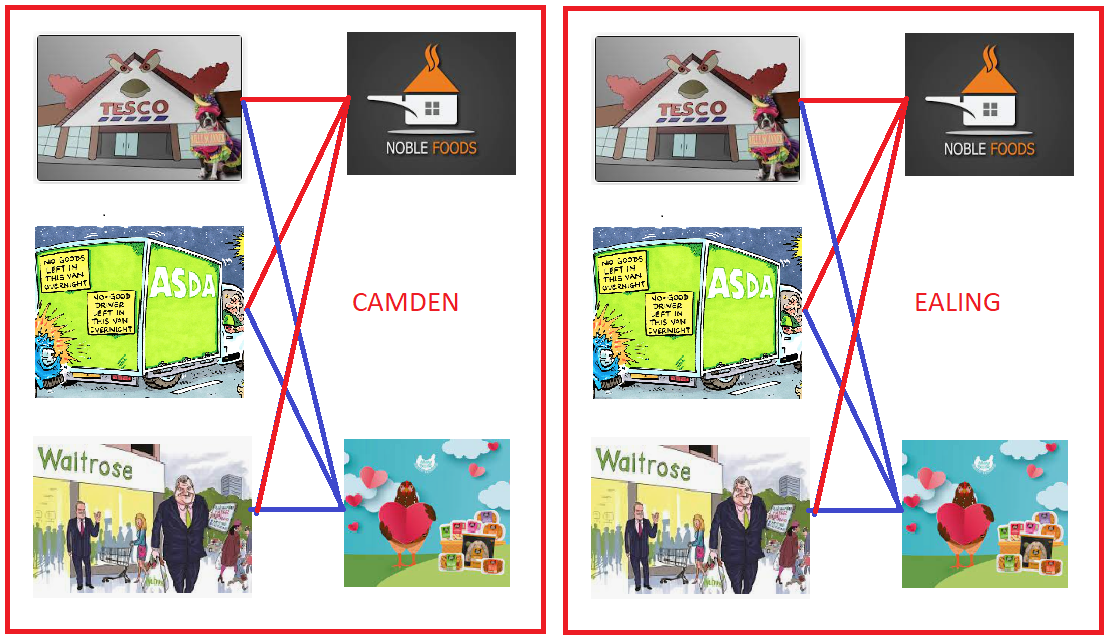

# Problem statement:

We gave three supermarket brands (for example, Lidl, Tesco and Asda) we denote them Shop 1, Shop 2 and Shop 3. They have branches in Camden, Ealing, Greenwich, Hounslow, Richmond upon Thames, Hammersmith and Fulham, Kensington and Chelsea and City of Westminster. They use two suppliers that have branches in the same London Boroughs, we have historical probability of item being in the given supplier branch of London Borough. We know how many items each supplier can deliver per days.


We are given total number of items demanded by every supermarket brand and information about when (date) and where (London Borough) the given supermarket can accept part of this total demand but exact value is not provided. The supplier can deliver items to supermarkets from the same Borough only. We have weights or probability that total supply for the given location is going to a particular supermarket. The task is to find date, location and number of items should be delivered to all three supermarkets.


In [2]:
# https://gist.github.com/brunosan/96288a8612894fca718aacbcc501ee09
# the following dhontAD code based on the link above 
def dhontAD(nSeats, votes):
    """
    nSeats is the number of seats
    votes is an aaray of probabilities
    """
    t_votes = votes.copy()
    seats   = np.zeros(len(votes))
    #
    if sum(votes) > 0:
       while sum(seats) < nSeats:
             next_seat = np.argmax(t_votes)
             seats[next_seat] += 1
             t_votes[next_seat] = votes[next_seat] / (seats[next_seat] + 1)
    return seats
#
nSeats = 100 # we want to allocate 100 seats
votes = np.array([0.2, 0.3, 0.5])
dhontAD(nSeats, votes)

array([20., 30., 50.])

\begin{equation}
\begin{aligned}
\max_{x} \quad & \sum_d \sum_b w_{1}\times x_{db1} +  w_{2}\times x_{db2} + ... + w_{N}\times x_{dbN}\\
\textrm{s.t.} \quad & x \in X     
\end{aligned}
\end{equation}
we have one weight per supermarket; d is the date and b is the London borough or location; x is the number of items given date, London Borough and supermarket; X is the feasable set for x. Supply and Demand has to be from the same London Borough.

#### Demand Weights could be weight of the objective function that are used in linear programming. 
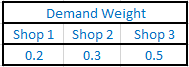
#### where $w_1 = 0.2$, $w_2 = 0.3$ and $w_3 = 0.5$.

#### The table below shows how many items is required by every supermarket in all considered locations during two days.
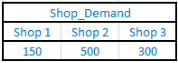

#### Information about when (date) and where (London Borough) the given supermarket is available to accept part of the above total demand (see the table called Shop_Demand above) but how much it will accept  it depends on the supply ib the given Borough and Demand Weights. 
If it is "+" (True) the the supermarket is available to accept the items on the particular date and London Borough (location) and it does not accept otherwise (when it is "-" or False). 
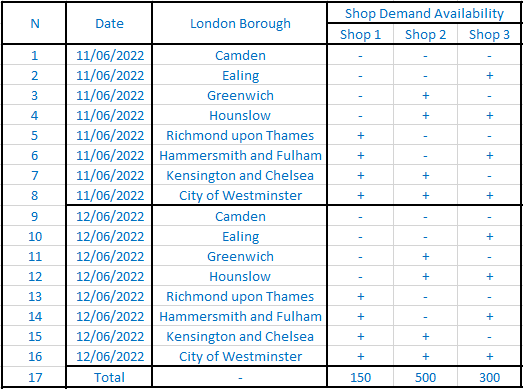

In [3]:
# We define the INPUTS in this cell!!!
#
nShops = 3
#
dates = ["11/06/2022"] * 8 + ["12/06/2022"] * 8
London_Boroughs = ["Camden", 
                   "Ealing", 
                   "Greenwich", 
                   "Hounslow", 
                   "Richmond upon Thames", 
                   "Hammersmith and Fulham", 
                   "Kensington and Chelsea", 
                   "City of Westminster"] * 2
#
Demand_Weights = {"Shop 1": 0.2, "Shop 2": 0.3, "Shop 3": 0.5}
print("Demand_Weights: ", Demand_Weights)
#
Shop_Demand    = {"Shop 1": 150, "Shop 2": 500, "Shop 3": 300}
print("Shop Demand: ", Shop_Demand)
#
Avalablity_Shop_1 = [False, False, False, False, True, True, True, True] * 2
Avalablity_Shop_2 = [False, False, True, True] * 4
Avalablity_Shop_3 = [False, True] * 8
demand = pd.DataFrame({"date": dates, 
                       "London Borough": London_Boroughs, 
                       "Avalablity Shop 1": Avalablity_Shop_1,
                       "Avalablity Shop 2": Avalablity_Shop_2,
                       "Avalablity Shop 3": Avalablity_Shop_3})
#
demand

Demand_Weights:  {'Shop 1': 0.2, 'Shop 2': 0.3, 'Shop 3': 0.5}
Shop Demand:  {'Shop 1': 150, 'Shop 2': 500, 'Shop 3': 300}


,date,London Borough,Avalablity Shop 1,Avalablity Shop 2,Avalablity Shop 3
0,11/06/2022,Camden,False,False,False
1,11/06/2022,Ealing,False,False,True
2,11/06/2022,Greenwich,False,True,False
3,11/06/2022,Hounslow,False,True,True
4,11/06/2022,Richmond upon Thames,True,False,False
5,11/06/2022,Hammersmith and Fulham,True,False,True
6,11/06/2022,Kensington and Chelsea,True,True,False
7,11/06/2022,City of Westminster,True,True,True
8,12/06/2022,Camden,False,False,False
9,12/06/2022,Ealing,False,False,True


#### The information about Supply include the probability of supply over different London Borough (location) and daily total amount of the supplied items (see Table below).
The probability could be different for different supplier but in our example it is the same for simplicity of presentation.
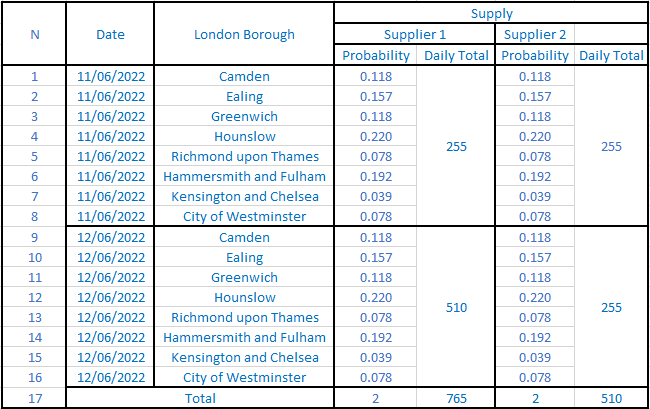

In [4]:
Daily_Total_Supplied_Quantity = {"Day 1, ALL Quantity, Supplier 1": 255, 
                                 "Day 2, ALL Quantity, Supplier 1": 510, 
                                 "Day 1, ALL Quantity, Supplier 2": 255, 
                                 "Day 2, ALL Quantity, Supplier 2": 255}
#
print("Daily Total Supplied Quantity: ", Daily_Total_Supplied_Quantity)
#
prob_of_supply_per_borough = np.array([0.118, 0.157, 0.118, 0.220, 0.078, 0.192, 0.039, 0.078])
#
supply_df = pd.DataFrame({"date": dates, 
                           "London Borough": London_Boroughs, 
                           "supplier 1 prob": list(prob_of_supply_per_borough) * 2,
                           "supplier 2 prob": list(prob_of_supply_per_borough) * 2,
                           })
#
print("\n Supplier probability over divverent London Boroughs (location):")
print(supply_df)

Daily Total Supplied Quantity:  {'Day 1, ALL Quantity, Supplier 1': 255, 'Day 2, ALL Quantity, Supplier 1': 510, 'Day 1, ALL Quantity, Supplier 2': 255, 'Day 2, ALL Quantity, Supplier 2': 255}

 Supplier probability over divverent London Boroughs (location):
          date          London Borough  supplier 1 prob  supplier 2 prob
0   11/06/2022                  Camden            0.118            0.118
1   11/06/2022                  Ealing            0.157            0.157
2   11/06/2022               Greenwich            0.118            0.118
3   11/06/2022                Hounslow            0.220            0.220
4   11/06/2022    Richmond upon Thames            0.078            0.078
5   11/06/2022  Hammersmith and Fulham            0.192            0.192
6   11/06/2022  Kensington and Chelsea            0.039            0.039
7   11/06/2022     City of Westminster            0.078            0.078
8   12/06/2022                  Camden            0.118            0.118
9   12/06/2

# We finish definition of INPUTS at this point. Below we have our computations based on the above inputs.

#### In the rest of the script we use blue colour to show values that can be considered as Inputs to the following cell and red one as the Output.  <br>

### I have developed the following algorithm for item allocation:
<pre>
1) get the number of  possible supplied items per date, Borough and supplier. In order to find this number for the given date and supplier apply Dhondt method using probability of the supply over locations and total number of possible supplied items per date;  
2) multiplied weights that are used in the optimization (one weight per supermarket in your case) by shop availability or demand (see symbols of "+" and "-" in excel table, "+" is when the shop is available to accept or need some items and "-" otherwise. Instead of "+" and "-" you can use True and False or 1 and 0, respectively;
3) normalised demand weight obtained in 2) for every row in such a way they they some to 1 unless they all equal to 0. In order to do so divide weights by it sum. Output is "Row Normalised Weight" (see Excel spreadsheet or notebook);
4) compute the number of available items for given supermarket for every combintion of date and London Borough (see Excel column "Supply AS Demand"). To find it apply Dhondt algorithm for every row of "Row Normalised Weight" (for example, see Excel spreadsheet) and the corresponding value of "Supply ALL";
5) sum column of "Supply AS Demand" for every shop to find how many items  are available from the supply per supermarket and find minimum between this value and the corresponding value that is demanded by the corresponding supermarket . The result of this operation is the row in Excel called "MINIMUM of Demand Total and Supply AS Demand Total". It is the number of items that can be delivered by suppliers and are required by supermarkets;
6) find "Column Normalised Weight" where we divide every "Supply AS Demand" column by its sum;
7) calculate the "Final Allocation" by applying Dhondt algorithm to every column of "Column Normalised Weight" and the corresponding value of the row called  "MINIMUM of Demand Total and Supply AS Demand Total" (see Excel spreadsheet). 
</pre>

# 1 We need to find how many supplied items is avalable for every supermarket given day and London Borough (location)
## 1.1 We multiply Shop Demand Availablity by Deman Weights  
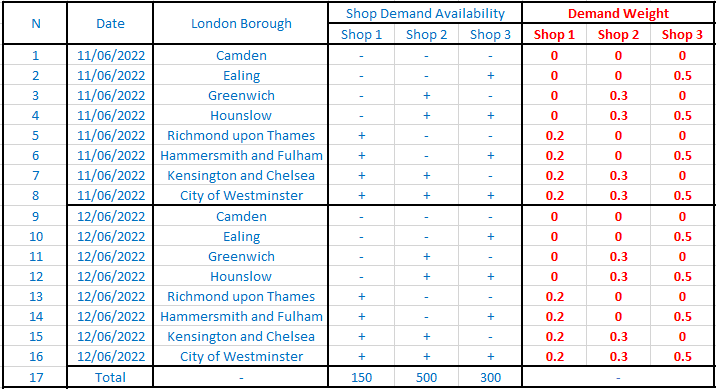

In [5]:
for i in range(1, nShops + 1):
    demand["Weight Shop " + str(i)] = \
    demand["Avalablity Shop " + str(i)].apply(lambda x: Demand_Weights["Shop " + str(i)] * x)
#
demand

,date,London Borough,Avalablity Shop 1,Avalablity Shop 2,Avalablity Shop 3,Weight Shop 1,Weight Shop 2,Weight Shop 3
0,11/06/2022,Camden,False,False,False,0.0,0.0,0.0
1,11/06/2022,Ealing,False,False,True,0.0,0.0,0.5
2,11/06/2022,Greenwich,False,True,False,0.0,0.3,0.0
3,11/06/2022,Hounslow,False,True,True,0.0,0.3,0.5
4,11/06/2022,Richmond upon Thames,True,False,False,0.2,0.0,0.0
5,11/06/2022,Hammersmith and Fulham,True,False,True,0.2,0.0,0.5
6,11/06/2022,Kensington and Chelsea,True,True,False,0.2,0.3,0.0
7,11/06/2022,City of Westminster,True,True,True,0.2,0.3,0.5
8,12/06/2022,Camden,False,False,False,0.0,0.0,0.0
9,12/06/2022,Ealing,False,False,True,0.0,0.0,0.5


## 1.2 For every row normalise Deman Weights after above multiplication that they sum to 1 over all supermarkets.
In order to normalise we divide weights by its sum. If the sum of Demand Weights in row is equal to 0 (see Camden Borough) we do not change anything - keep this row all zeros. 
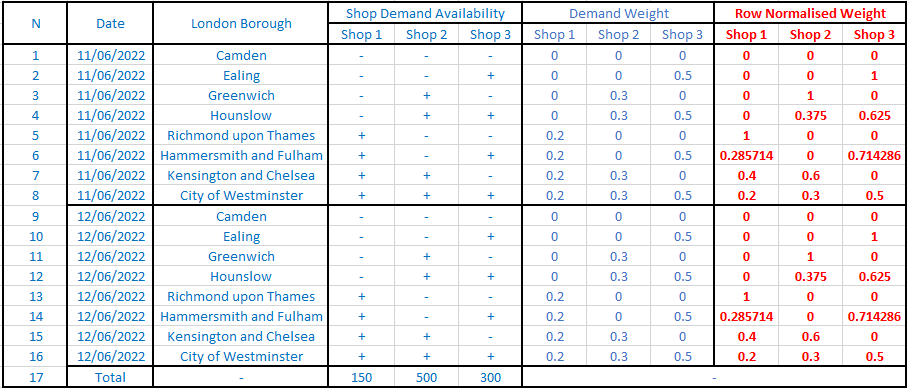

In [6]:
for i in range(1, nShops + 1):
    if i == 1:
       demand["Weight Shop SUM"] =  demand["Weight Shop " + str(i)].copy()
    else:
       demand["Weight Shop SUM"] += demand["Weight Shop " + str(i)].copy() 
#
for i in range(1, nShops + 1):
    demand["row Normalised Weight Shop " + str(i)] = \
    demand.apply(lambda x: x["Weight Shop " + str(i)] / x["Weight Shop SUM"] if x["Weight Shop SUM"] > 0 else 0, \
                 axis = 1)
#
demand

,date,London Borough,Avalablity Shop 1,Avalablity Shop 2,Avalablity Shop 3,Weight Shop 1,Weight Shop 2,Weight Shop 3,Weight Shop SUM,row Normalised Weight Shop 1,row Normalised Weight Shop 2,row Normalised Weight Shop 3
0,11/06/2022,Camden,False,False,False,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
1,11/06/2022,Ealing,False,False,True,0.0,0.0,0.5,0.5,0.000000,0.000,1.000000
2,11/06/2022,Greenwich,False,True,False,0.0,0.3,0.0,0.3,0.000000,1.000,0.000000
3,11/06/2022,Hounslow,False,True,True,0.0,0.3,0.5,0.8,0.000000,0.375,0.625000
4,11/06/2022,Richmond upon Thames,True,False,False,0.2,0.0,0.0,0.2,1.000000,0.000,0.000000
5,11/06/2022,Hammersmith and Fulham,True,False,True,0.2,0.0,0.5,0.7,0.285714,0.000,0.714286
6,11/06/2022,Kensington and Chelsea,True,True,False,0.2,0.3,0.0,0.5,0.400000,0.600,0.000000
7,11/06/2022,City of Westminster,True,True,True,0.2,0.3,0.5,1.0,0.200000,0.300,0.500000
8,12/06/2022,Camden,False,False,False,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
9,12/06/2022,Ealing,False,False,True,0.0,0.0,0.5,0.5,0.000000,0.000,1.000000


## 1.3 Find the quantity of items that suppliers can provide for the given date and London Borough (location). 

#### For every date we apply D'hont algorithm that uses Supplier probabilities (vector of eight elements, for example, (0.118, 0.157, 0.118, 0.220, 0.078, 0.192, 0.039, 0.078)) and Supplier Total (for example, 255) given the date and supplier . In our further calculation we only need all available supply (see column "ALL" below) per London Borough.
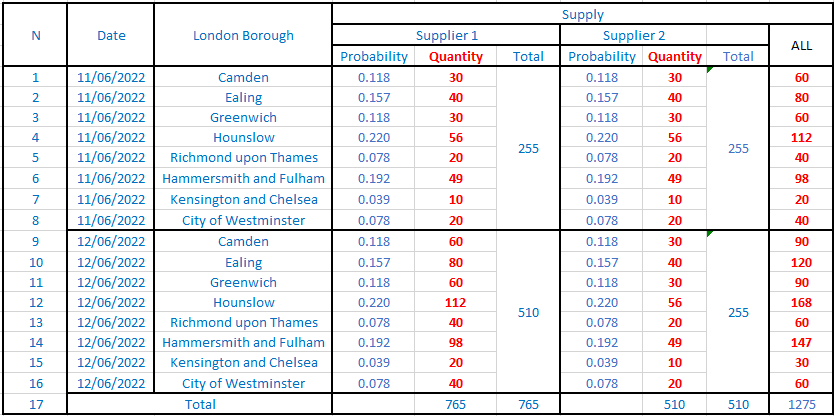

In [7]:
#
nSuppliers = 2
nDays      = 2
#
Dates = ["11/06/2022", "12/06/2022"]
#
Quantity_Supplied_given_Supplier = {"1": [], "2": []}
#
for i in range(1, nSuppliers + 1):
    for k in range(1, len(Dates) + 1):
        Date = Dates[k - 1]
        prob                  = supply_df[supply_df["date"] == Date]["supplier " + str(i) + " prob"].values
        supplied_daily_amount = Daily_Total_Supplied_Quantity["Day " + str(k) + \
                                                              ", ALL Quantity, Supplier " + str(i)] 
        #
        Quantity_Supplied_given_Supplier_Date = dhontAD(supplied_daily_amount, prob)
        #
        Quantity_Supplied_given_Supplier[str(i)] = \
        Quantity_Supplied_given_Supplier[str(i)] + list(Quantity_Supplied_given_Supplier_Date)
    #
    supply_df["supplier " + str(i) + " quantity"] = Quantity_Supplied_given_Supplier[str(i)]
    supply_df["supplier " + str(i) + " quantity"] =  supply_df["supplier " + str(i) + " quantity"].astype(int)
#
supply_df["Supplier ALL"] = supply_df["supplier 1 quantity"] + supply_df["supplier 2 quantity"]
#
supply_df

,date,London Borough,supplier 1 prob,supplier 2 prob,supplier 1 quantity,supplier 2 quantity,Supplier ALL
0,11/06/2022,Camden,0.118,0.118,30,30,60
1,11/06/2022,Ealing,0.157,0.157,40,40,80
2,11/06/2022,Greenwich,0.118,0.118,30,30,60
3,11/06/2022,Hounslow,0.220,0.220,56,56,112
4,11/06/2022,Richmond upon Thames,0.078,0.078,20,20,40
5,11/06/2022,Hammersmith and Fulham,0.192,0.192,49,49,98
6,11/06/2022,Kensington and Chelsea,0.039,0.039,10,10,20
7,11/06/2022,City of Westminster,0.078,0.078,20,20,40
8,12/06/2022,Camden,0.118,0.118,60,30,90
9,12/06/2022,Ealing,0.157,0.157,80,40,120


# 1.4 Evaluate how many items can be supplied to the given shop
#### We  join demand and supply_df tables and then apply DHont algorithm for every row using Row Normalised Weights (see demand table above)  and Supplier ALL (see supply_df above) as following:
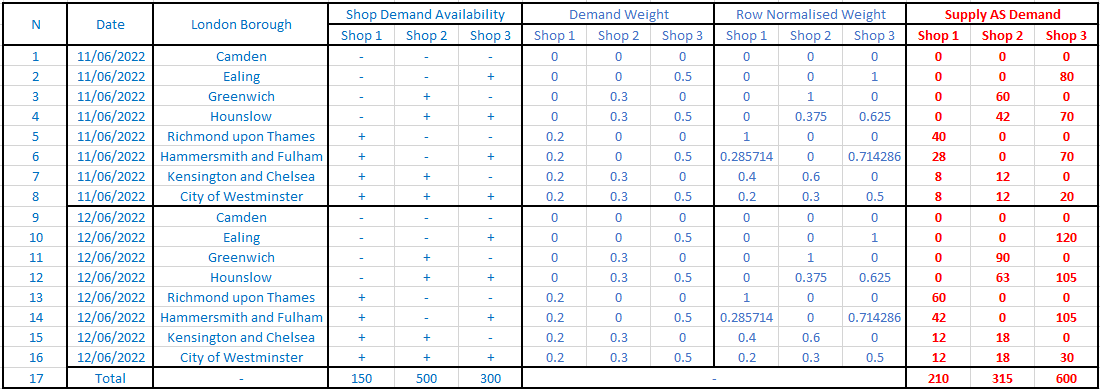
### Note that, DHont algorithm in this case can be implemented in BigQuery using Keras because the number of shops given the supermarket network in the London Borough is less than 233155. this constrain comes from restriction that Keras in BigQuery process data in batches around 233155 elements in the batch.

In [15]:
demand_supply = demand.merge(supply_df, on = ["date", "London Borough"])
r_norm_shop = "row Normalised Weight Shop "
demand_supply["Supply AS Demand"] = demand_supply.apply(lambda x: dhontAD(x["Supplier ALL"], \
                                            x[[r_norm_shop + "1", r_norm_shop + "2", r_norm_shop + "3"]].values), \
                                                        axis = 1)
#
for i in range(1, nShops + 1):
    demand_supply["Supply AS Demand Shop " + str(i)] = demand_supply["Supply AS Demand"].apply( \
                                                                                         lambda x: int(x[i - 1]))
#    
Total_Supply_AS_Demand = demand_supply[["Supply AS Demand Shop 1", "Supply AS Demand Shop 2", \
                                        "Supply AS Demand Shop 3"]].sum(axis = 0)
print("Total Supply AS Demand:") 
print(Total_Supply_AS_Demand)
#
demand_supply[["date", "London Borough", "Supplier ALL",\
               r_norm_shop+"1", r_norm_shop+"2", r_norm_shop+"3", \
               "Supply AS Demand Shop 1", "Supply AS Demand Shop 2", \
                                        "Supply AS Demand Shop 3"]]

Total Supply AS Demand:
Supply AS Demand Shop 1    210
Supply AS Demand Shop 2    315
Supply AS Demand Shop 3    600
dtype: int64


,date,London Borough,Supplier ALL,row Normalised Weight Shop 1,row Normalised Weight Shop 2,row Normalised Weight Shop 3,Supply AS Demand Shop 1,Supply AS Demand Shop 2,Supply AS Demand Shop 3
0,11/06/2022,Camden,60,0.000000,0.000,0.000000,0,0,0
1,11/06/2022,Ealing,80,0.000000,0.000,1.000000,0,0,80
2,11/06/2022,Greenwich,60,0.000000,1.000,0.000000,0,60,0
3,11/06/2022,Hounslow,112,0.000000,0.375,0.625000,0,42,70
4,11/06/2022,Richmond upon Thames,40,1.000000,0.000,0.000000,40,0,0
5,11/06/2022,Hammersmith and Fulham,98,0.285714,0.000,0.714286,28,0,70
6,11/06/2022,Kensington and Chelsea,20,0.400000,0.600,0.000000,8,12,0
7,11/06/2022,City of Westminster,40,0.200000,0.300,0.500000,8,12,20
8,12/06/2022,Camden,90,0.000000,0.000,0.000000,0,0,0
9,12/06/2022,Ealing,120,0.000000,0.000,1.000000,0,0,120


# 1.5 Evaluation of Available Demand
#### We find the minimum between what is required and what is available for the given supermarket network:
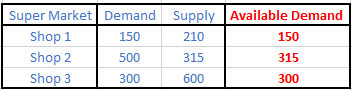

In [9]:
Total_Supply_AS_Demand = demand_supply[["Supply AS Demand Shop 1", \
                                        "Supply AS Demand Shop 2", "Supply AS Demand Shop 3"]].sum(axis = 0)
print("Total Supply AS Demand:") 
print(Total_Supply_AS_Demand)
Available_Demand = {}
for i in range(1, nShops + 1):
    Available_Demand["shop " + str(i)] = min(Shop_Demand["Shop " + str(i)], \
                                             Total_Supply_AS_Demand["Supply AS Demand Shop " + str(i)]) 
#
print("Available Demand: ", Available_Demand)

Total Supply AS Demand:
Supply AS Demand Shop 1    210
Supply AS Demand Shop 2    315
Supply AS Demand Shop 3    600
dtype: int64
Available Demand:  {'shop 1': 150, 'shop 2': 315, 'shop 3': 300}


# 1.6 Summary
#### The only purpose of the Section 1 is to find Available Demand per supermarket or demand that can be fulfill 

and Supply AS Demand that can be used for weight calculation in the nexr Section:
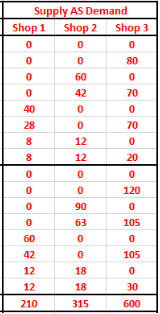

# 2. Final Allocation of Items given Date, Borough and Shop
# 2.1 Column Normalise Weights
For every shop of Supply AS Demand win order to compute weight we divide the every value of Supply AS Demand by the corresponding column total. If we sum any column of the obtained weight we get 1.
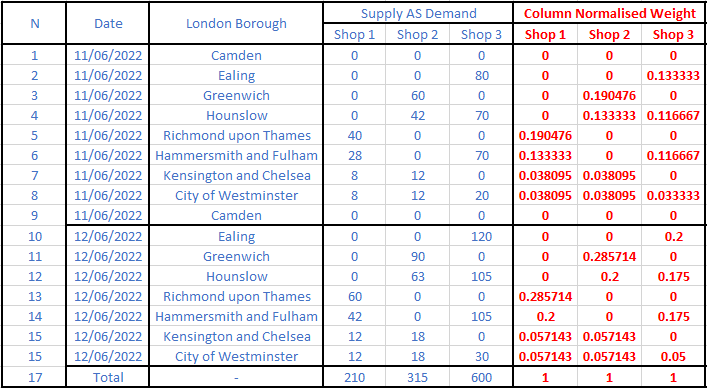

In [10]:
# Perform allocation for one shop at a time
for i in range(1, nShops + 1):
    total = demand_supply["Supply AS Demand Shop " + str(i)].sum()
    demand_supply["Column Normalised Weight " + str(i)] = demand_supply["Supply AS Demand Shop " + str(i)] / total
#
demand_supply[["date", "London Borough", "Supply AS Demand Shop 1", \
               "Supply AS Demand Shop 2", "Supply AS Demand Shop 3", \
               "Column Normalised Weight 1", "Column Normalised Weight 2", "Column Normalised Weight 3"]]

,date,London Borough,Supply AS Demand Shop 1,Supply AS Demand Shop 2,Supply AS Demand Shop 3,Column Normalised Weight 1,Column Normalised Weight 2,Column Normalised Weight 3
0,11/06/2022,Camden,0,0,0,0.000000,0.000000,0.000000
1,11/06/2022,Ealing,0,0,80,0.000000,0.000000,0.133333
2,11/06/2022,Greenwich,0,60,0,0.000000,0.190476,0.000000
3,11/06/2022,Hounslow,0,42,70,0.000000,0.133333,0.116667
4,11/06/2022,Richmond upon Thames,40,0,0,0.190476,0.000000,0.000000
5,11/06/2022,Hammersmith and Fulham,28,0,70,0.133333,0.000000,0.116667
6,11/06/2022,Kensington and Chelsea,8,12,0,0.038095,0.038095,0.000000
7,11/06/2022,City of Westminster,8,12,20,0.038095,0.038095,0.033333
8,12/06/2022,Camden,0,0,0,0.000000,0.000000,0.000000
9,12/06/2022,Ealing,0,0,120,0.000000,0.000000,0.200000


# 2.2 Final Allocations of Items to Shops
We use the column normalised weight and Available Demand as inputs to DHont algorithm. Output of Dhont algorithm is the final allocation of Items to the shop as following:
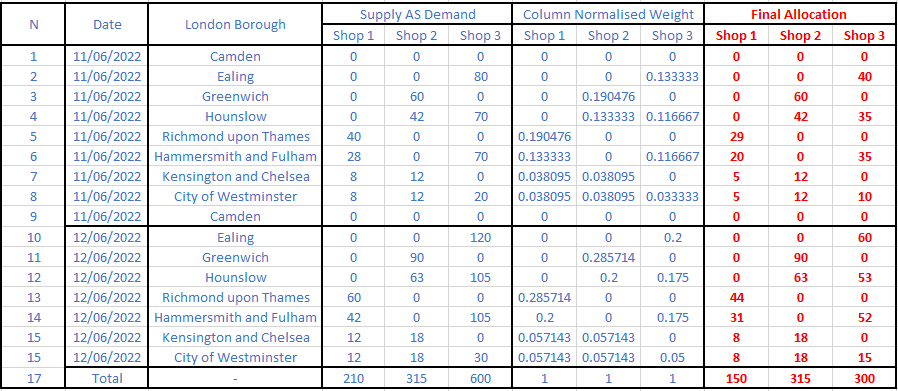

In [11]:
# Perform allocatio for one shop at a time
for i in range(1, nShops + 1):
    available = Available_Demand["shop " + str(i)]
    print("Avalaible Demand Shop " + str(i) + ": ",  available)
    #
    demand_supply["Final Allocation Shop " + str(i)] = dhontAD(available, \
           demand_supply["Column Normalised Weight " + str(i)].values / total)
    demand_supply["Final Allocation Shop " + str(i)] = demand_supply["Final Allocation Shop " + str(i)].astype(int)
#
demand_supply[["date", "London Borough",  "Column Normalised Weight 1", \
               "Column Normalised Weight 2", "Column Normalised Weight 3", \
               "Final Allocation Shop 1", "Final Allocation Shop 2", "Final Allocation Shop 3"]]

Avalaible Demand Shop 1:  150
Avalaible Demand Shop 2:  315
Avalaible Demand Shop 3:  300


,date,London Borough,Column Normalised Weight 1,Column Normalised Weight 2,Column Normalised Weight 3,Final Allocation Shop 1,Final Allocation Shop 2,Final Allocation Shop 3
0,11/06/2022,Camden,0.000000,0.000000,0.000000,0,0,0
1,11/06/2022,Ealing,0.000000,0.000000,0.133333,0,0,40
2,11/06/2022,Greenwich,0.000000,0.190476,0.000000,0,60,0
3,11/06/2022,Hounslow,0.000000,0.133333,0.116667,0,42,35
4,11/06/2022,Richmond upon Thames,0.190476,0.000000,0.000000,29,0,0
5,11/06/2022,Hammersmith and Fulham,0.133333,0.000000,0.116667,20,0,35
6,11/06/2022,Kensington and Chelsea,0.038095,0.038095,0.000000,5,12,0
7,11/06/2022,City of Westminster,0.038095,0.038095,0.033333,5,12,10
8,12/06/2022,Camden,0.000000,0.000000,0.000000,0,0,0
9,12/06/2022,Ealing,0.000000,0.000000,0.200000,0,0,60


### Test: Available Demand has to be equal to the corresponding Final Allocation

In [12]:
# Test: final Allocation should be equalt to Available_Demand.
print("Available_Demand: ", Available_Demand)
demand_supply[["Final Allocation Shop 1", "Final Allocation Shop 2", "Final Allocation Shop 3"]].sum(axis = 0)

Available_Demand:  {'shop 1': 150, 'shop 2': 315, 'shop 3': 300}


Final Allocation Shop 1    150
Final Allocation Shop 2    315
Final Allocation Shop 3    300
dtype: int64